In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

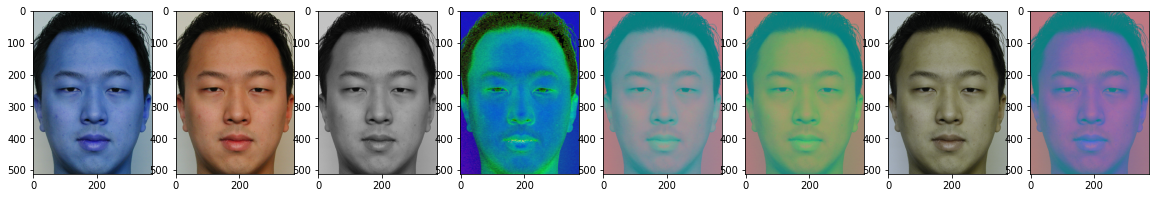

In [2]:
img_ori = cv2.imread('INPUT PATH')
img_gt = cv2.imread('GROUNDTRUTH PATH',0)
img_rgb = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_ori, cv2.COLOR_BGR2LAB)
img_ycbcr = cv2.cvtColor(img_ori, cv2.COLOR_BGR2YCR_CB)
img_xyz = cv2.cvtColor(img_ori, cv2.COLOR_BGR2XYZ)
img_yuv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2YUV)

plt.figure(figsize=(20,20))
plt.subplot(1,8,1)
plt.imshow(img_ori)
plt.subplot(1,8,2)
plt.imshow(img_rgb)
plt.subplot(1,8,3)
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,8,4)
plt.imshow(img_hsv)
plt.subplot(1,8,5)
plt.imshow(img_lab)
plt.subplot(1,8,6)
plt.imshow(img_ycbcr)
plt.subplot(1,8,7)
plt.imshow(img_xyz)
plt.subplot(1,8,8)
plt.imshow(img_yuv)

### Background Segmentation

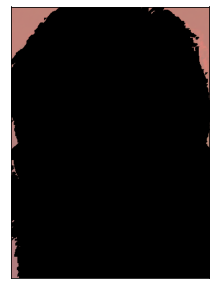

In [3]:
def background_segmentation(image):
    # color range
    lower_range = (175,110,110) 
    upper_range = (255,140,140)
    mask = cv2.inRange(image, lower_range, upper_range)
    kernelCross = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
    background = cv2.bitwise_and(image, image, mask = mask)
    background = cv2.morphologyEx(background, cv2.MORPH_CLOSE, kernelCross, iterations=4)

    return background

beijing = background_segmentation(img_ycbcr)
plt.figure(figsize=(5,5))
plt.xticks([]), plt.yticks([])
plt.imshow(beijing,cmap='gray')
plt.show()

### Hair & Eyebrows Segmentation

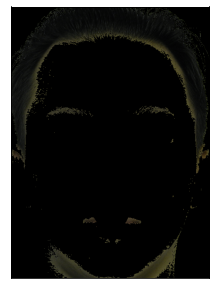

In [4]:
def hairEyebrows_segmentation(image):
    # overlay blocks (blank white region) on image
    block = np.array([[50,240],[190,450],[310,235]])
    cv2.fillPoly(image, pts = [block], color =(255,255,255)) 
        
    # color range
    lower_range = (0,0,0) 
    upper_range = (90,90,50)
    mask = cv2.inRange(image, lower_range, upper_range)
    hairEyebrows = cv2.bitwise_and(image, image, mask = mask)

    return hairEyebrows 

maofa = hairEyebrows_segmentation(img_xyz)
plt.figure(figsize=(5,5))
plt.xticks([]), plt.yticks([])
plt.imshow(maofa,cmap='gray')
plt.show();

### Mouth Segmentation

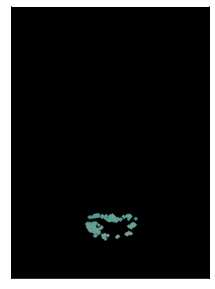

In [5]:
def mouth_segmentation(image):
    # set region of interest for mouth
    mouth_roi = image[370:460,70:280]
    mouth = image.copy()                                # copy of input image
    mouth[mouth!=0] = 0                                 # change all pixels of copied image to white 
    roi = mouth[370:460,70:280]                         # roi of mouth on white image
    result = cv2.addWeighted(mouth_roi, 1, roi, 0, 0)   # put mouth_roi(img_lab) on the roi of white image
    mouth[370:460,70:280] = result
        
    #color range
    lower_range = (70,146,140)
    upper_range = (130,170,153)
    mask = cv2.inRange(mouth, lower_range, upper_range)
    kernelEllipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) 
    mouth = cv2.bitwise_and(mouth,mouth,mask=mask)
    mouth = cv2.erode(mouth, kernelEllipse, iterations=2)
    mouth = cv2.dilate(mouth, kernelEllipse, iterations=3)

    return mouth

zuiba = mouth_segmentation(img_lab)
plt.figure(figsize=(5,5))
plt.xticks([]), plt.yticks([])
plt.imshow(zuiba,cmap='gray')
plt.show();

### Eyes Segmentation

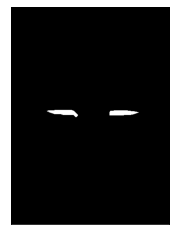

In [6]:
def eyes_segmentation(image):
    # canny edges detection & set region of interest for eyes
    eyes_edges = cv2.Canny(image, threshold1=100,threshold2=180)
    eyes_roi = eyes_edges[210:290,60:310]
    eyes = img_gray.copy()
    eyes[eyes!=0] = 0
    roi = eyes[210:290,60:310]
    result = cv2.addWeighted(eyes_roi, 1, roi, 0, 0)
    eyes[210:290,60:310] = result

    #color range
    lower_range = (1)
    upper_range = (255)
    mask = cv2.inRange(eyes, lower_range, upper_range)
    kernelEllipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)) 
    eyes = cv2.bitwise_and(eyes,eyes,mask=mask)
    eyes = cv2.morphologyEx(eyes,cv2.MORPH_CLOSE,kernelEllipse,iterations=5)
    eyes = cv2.cvtColor(eyes, cv2.COLOR_GRAY2RGB)
        
    return eyes

yanjing = eyes_segmentation(img_gray)
plt.xticks([]), plt.yticks([])
plt.imshow(yanjing,cmap='gray')

### Nose Segmentation

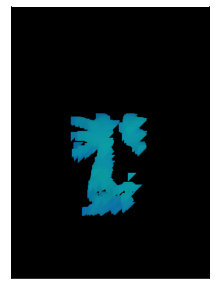

In [7]:
def nose_segmentation(image):
    # set region of interest for nose
    nose_roi = image[200:380,110:240]
    nose = image.copy()
    nose[nose!=0] = 0
    roi = nose[200:380,110:240]
    result = cv2.addWeighted(nose_roi, 1, roi, 0, 0)
    nose[200:380,110:240] = result

    # color range
    lower_range = (8,100,140) 
    upper_range = (13,160,170)
    mask = cv2.inRange(nose, lower_range, upper_range)
    kernelCross = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
    nose = cv2.bitwise_and(nose,nose,mask=mask)
    nose = cv2.erode(nose, kernelCross, iterations=2)
    nose = cv2.dilate(nose, kernelCross, iterations=15)

    return nose

bizi = nose_segmentation(img_hsv)
plt.figure(figsize=(5,5))
plt.xticks([]), plt.yticks([])
plt.imshow(bizi,cmap='gray')
plt.show();

### Skin Segmentation

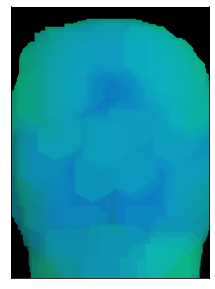

In [8]:
def skin_segmentation(image):
    # color range       
    lower_range = (10,80,80) 
    upper_range = (200,200,200)
    mask = cv2.inRange(image, lower_range, upper_range)
    kernelEllipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
    skin = cv2.bitwise_and(image,image,mask=mask)
    skin = cv2.erode(skin,kernelEllipse,iterations=1)
    skin = cv2.dilate(skin,kernelEllipse,iterations=16)

    return skin

pifu = skin_segmentation(img_hsv)
plt.figure(figsize=(5,5))
plt.xticks([]), plt.yticks([])
plt.imshow(pifu,cmap='gray')
plt.show();

In [9]:
# combine segmentations masks (3 dimensions)
lian = beijing + pifu + maofa + zuiba + yanjing + bizi

# convert to grayscale
pifu = cv2.cvtColor(pifu, cv2.COLOR_RGB2GRAY)
bizi = cv2.cvtColor(bizi, cv2.COLOR_RGB2GRAY)
yanjing = cv2.cvtColor(yanjing, cv2.COLOR_RGB2GRAY)
zuiba = cv2.cvtColor(zuiba, cv2.COLOR_RGB2GRAY)
maofa = cv2.cvtColor(maofa, cv2.COLOR_RGB2GRAY)
beijing = cv2.cvtColor(beijing, cv2.COLOR_RGB2GRAY)

# set output image
output =  cv2.cvtColor(lian, cv2.COLOR_RGB2GRAY)

# assign intensity
output[np.where(pifu)] = [5]
output[np.where(bizi)] = [4]
output[np.where(yanjing)] = [3]
output[np.where(zuiba)] = [2]
output[np.where(maofa)] = [1]
output[np.where(beijing)] = [0]

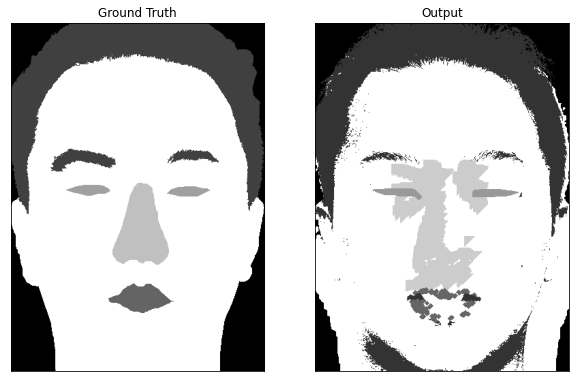

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.imshow(img_gt, cmap='gray')
plt.title('Ground Truth')
plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.imshow(output, cmap='gray')
plt.title('Output')
plt.show();